# Business Understanding:

### Based on data given, Seattle has experienced a 194673 road accidents in the past 16 years. which caused: death & injured 157943 persons, 265233 damaged vehicles, and 679 damaged bicycles. Our target in this study is to detrmine the most reasons of road accidents, and prediction to save lives & properties, which considered a resposibility of all audinees; local govurnment, citizens, and police department.

# Data Understanding:

### The data was collected by the Seattle Police Department and Accident Traffic Records Department from 2004 to May 2020. The data contain 38 columns, and 194673 raws. The dependent variable is “SEVERITYCODE”. and 37 attributes. It contain some attributes not important to this study, which gives more description of accidents. For example "SDOTCOLNUM","X", "Y", "INCDTTM", "INCDATE", "REPORTNO", "COLDETKEY", "INCKEY" and "OBJECTID". Moreover, "EXCEPTRSNCODE", "EXCEPTRSNDESC", "PEDROWNOTGRNT", "SPEEDING", "INATTENTIONIND", have a high number of missing data that would skew and bias our predictive model.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np 
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df_data_1.groupby(['SEVERITYCODE','SEVERITYDESC']).sum()

,,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,SEVERITYDESC,,,,,,,,,,,,,,,
1,Property Damage Only Collision,-1.617469e+07,6.296217e+06,14693412341,19086510801,19114016487,1.388175e+09,136485,317921,719,679,265233,1777110,6.486308e+11,5956749,207489439
2,Injury Collision,-6.987248e+06,2.720020e+06,6424591068,8380186281,8393047021,1.055754e+09,116376,157943,6511,4848,108691,922570,2.676989e+11,46488374,1696889835


In [4]:
df_data_1.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [5]:
print(df_data_1.dtypes)

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [6]:
df_data_1.describe(include=['object'])

,REPORTNO,STATUS,ADDRTYPE,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYDESC,COLLISIONTYPE,INCDATE,INCDTTM,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
count,194673,194673,192747,191996,84811,5638,194673,189769,194673,194673,...,29805,189789,189592,189661,189503,4667,9333,194655,189769,194673
unique,194670,2,3,24102,2,1,2,10,5985,162058,...,1,4,11,9,9,1,1,115,62,2
top,1776526,Matched,Block,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,,"Not Enough Information, or Insufficient Locati...",Property Damage Only Collision,Parked Car,2006/11/02 00:00:00+00,11/2/2006,...,Y,N,Clear,Dry,Daylight,Y,Y,32,One parked--one moving,N
freq,2,189786,126926,276,79173,5638,136485,47987,96,96,...,29805,100274,111135,124510,116137,4667,9333,27612,44421,187457


In [7]:
df_data_1.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


In [8]:
df_data_1[['SEVERITYCODE','PEDCYLCOUNT','VEHCOUNT']].corr()

,SEVERITYCODE,PEDCYLCOUNT,VEHCOUNT
SEVERITYCODE,1.000000,0.214218,-0.054686
PEDCYLCOUNT,0.214218,1.000000,-0.253773
VEHCOUNT,-0.054686,-0.253773,1.000000


In [9]:
df_data_1['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


In [10]:
df_data_1['ROADCOND'].value_counts().to_frame()

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


In [11]:
df_data_1['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


In [12]:
df_test = df_data_1[['SEVERITYCODE','WEATHER','UNDERINFL','ROADCOND','LIGHTCOND']]
df_test.head()

,SEVERITYCODE,WEATHER,UNDERINFL,ROADCOND,LIGHTCOND
0,2,Overcast,N,Wet,Daylight
1,1,Raining,0,Wet,Dark - Street Lights On
2,1,Overcast,0,Dry,Daylight
3,1,Clear,N,Dry,Daylight
4,2,Raining,0,Wet,Daylight


-0.054685767626945055 8.177903923768769e-129


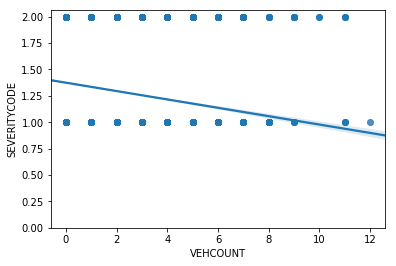

In [13]:
sns.regplot(x="VEHCOUNT", y="SEVERITYCODE", data=df_data_1)
plt.ylim(0,)
pearson_coef, p_value = stats.pearsonr(df_data_1['VEHCOUNT'], df_data_1['SEVERITYCODE'])
print (pearson_coef, p_value)

0.21421818271572413 0.0


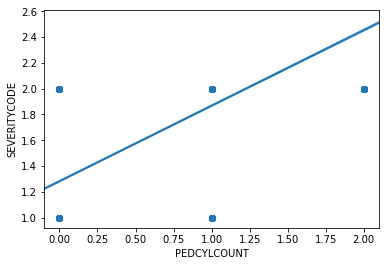

In [14]:
sns.regplot(x="PEDCYLCOUNT", y="SEVERITYCODE", data=df_data_1)
pearson_coef, p_value = stats.pearsonr(df_data_1['PEDCYLCOUNT'], df_data_1['SEVERITYCODE'])
print (pearson_coef, p_value)

0.24633815772800446 0.0


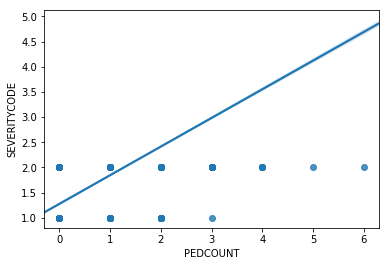

In [15]:
sns.regplot(x="PEDCOUNT", y="SEVERITYCODE", data=df_data_1)
pearson_coef, p_value = stats.pearsonr(df_data_1['PEDCOUNT'], df_data_1['SEVERITYCODE'])
print (pearson_coef, p_value)